In [37]:
import rasterio as rio
from rasterio.plot import plotting_extent
import rasterio.plot
import numpy as np
from topolib.subsetDat import subsetBBox;
from topolib import gda_lib;
from pyproj import Proj, transform
from icepyx import icesat2data as ipd
%matplotlib inline
import matplotlib.pyplot as plt 

In [49]:
#path to raster
raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOGE_20180908_20180913.tif'
#raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOCM_20180912_20180913.tif'
#raster_path = '/home/jovyan/shared/data-aragon/ASO_3M_PCDTM_USCOGT_20180912_20180913.tif'



In [50]:
ds = rio.open(raster_path)
dem = ds.read(1)
dem = np.ma.masked_equal(dem,gda_lib.get_ndv(ds))
xmin,ymin,xmax,ymax = ds.bounds
ds.crs

CRS.from_epsg(32613)

In [51]:
raster = rio.open(raster_path)
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 15408,
 'height': 17213,
 'count': 1,
 'crs': CRS.from_epsg(32613),
 'transform': Affine(3.0, 0.0, 305139.0,
        0.0, -3.0, 4330251.0)}

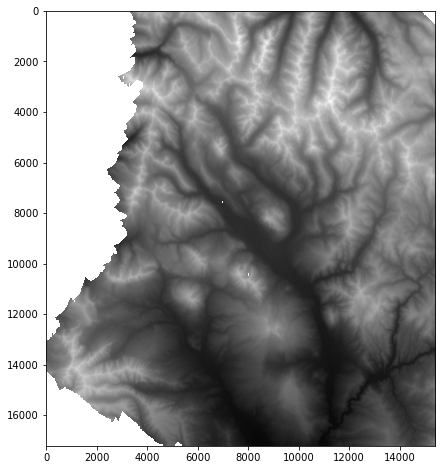

In [52]:
fig,ax = plt.subplots(figsize=(10,8))

rio.plot.show(dem, ax=ax,cmap='gray')

In [41]:
[L,B,R,T] = subsetBBox(raster_path,raster.crs,'epsg:4326') # now read projection from DEM, convert to WGS84
    #[L,B,R,T] = subsetBBox(raster,'epsg:32611','epsg:4326')
    # Area of interest
boundaries = {
    'LowerLeft_Lon': L,
    'LowerLeft_Lat': B,
    'UpperRight_Lon': R,
    'UpperRight_Lat': T,
}
L,B,R,T

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:294: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(" ".join((projstring, projkwargs)))
/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.

(-106.81740494874118,
 38.65433675725351,
 -106.29866893029747,
 39.08080257707414)

# Find Icesat2 data within domain

In [53]:
# ASO extent
short_name = 'ATL03'
spatial_extent = [L,B,R,T]
date_range = ['2019-01-01','2019-11-30']

In [54]:
region_a = ipd.Icesat2Data(short_name, spatial_extent, date_range)

In [55]:
print(region_a.dataset)
print(region_a.dates)
print(region_a.start_time)
print(region_a.end_time)
print(region_a.dataset_version)
print(region_a.spatial_extent)

ATL03
['2019-01-01', '2019-11-30']
00:00:00
23:59:59
003
['bounding box', [-106.81740494874118, 38.65433675725351, -106.29866893029747, 39.08080257707414]]


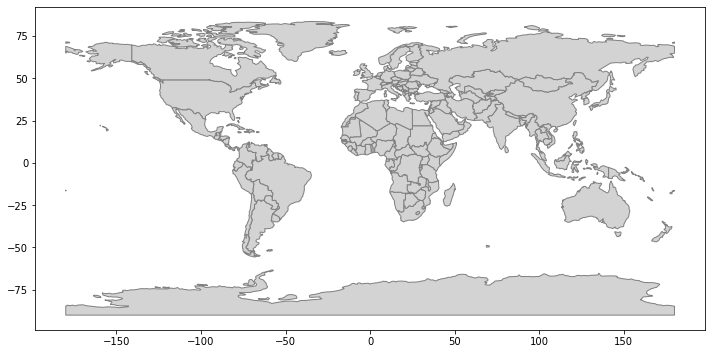

In [56]:
region_a.visualize_spatial_extent()

In [57]:
print(region_a.latest_version())
region_a.dataset_summary_info()

003
dataset_id :  ATLAS/ICESat-2 L2A Global Geolocated Photon Data V003
short_name :  ATL03
version_id :  003
time_start :  2018-10-13T00:00:00.000Z
coordinate_system :  CARTESIAN
summary :  This data set (ATL03) contains height above the WGS 84 ellipsoid (ITRF2014 reference frame), latitude, longitude, and time for all photons downlinked by the Advanced Topographic Laser Altimeter System (ATLAS) instrument on board the Ice, Cloud and land Elevation Satellite-2 (ICESat-2) observatory. The ATL03 product was designed to be a single source for all photon data and ancillary information needed by higher-level ATLAS/ICESat-2 products. As such, it also includes spacecraft and instrument parameters and ancillary data not explicitly required for ATL03.
orbit_parameters :  {'swath_width': '36.0', 'period': '94.29', 'inclination_angle': '92.0', 'number_of_orbits': '0.071428571', 'start_circular_latitude': '0.0'}


In [58]:
#build and view the parameters that will be submitted in our query
region_a.CMRparams

{'short_name': 'ATL03',
 'version': '003',
 'temporal': '2019-01-01T00:00:00Z,2019-11-30T23:59:59Z',
 'bounding_box': '-106.81740494874118,38.65433675725351,-106.29866893029747,39.08080257707414'}

In [59]:
#get a list of the available granule IDs that meet your search criteria
region_a.avail_granules(ids=True)

['ATL03_20190103064855_00890206_003_01.h5',
 'ATL03_20190107064034_01500206_003_01.h5',
 'ATL03_20190205051647_05920206_003_01.h5',
 'ATL03_20190206170057_06150202_003_01.h5',
 'ATL03_20190306035247_10340206_003_01.h5',
 'ATL03_20190307153657_10570202_003_01.h5',
 'ATL03_20190404022846_00890306_003_01.h5',
 'ATL03_20190408022026_01500306_003_01.h5',
 'ATL03_20190409140436_01730302_003_01.h5',
 'ATL03_20190507005624_05920306_003_01.h5',
 'ATL03_20190508124034_06150302_003_01.h5',
 'ATL03_20190604233221_10340306_003_01.h5',
 'ATL03_20190606111631_10570302_003_01.h5',
 'ATL03_20190805203605_05920406_003_01.h5',
 'ATL03_20190807082015_06150402_003_01.h5',
 'ATL03_20190903191210_10340406_003_01.h5',
 'ATL03_20190905065620_10570402_003_01.h5',
 'ATL03_20191002174817_00890506_003_01.h5',
 'ATL03_20191006173957_01500506_003_01.h5',
 'ATL03_20191008052407_01730502_003_01.h5',
 'ATL03_20191104161559_05920506_003_01.h5',
 'ATL03_20191106040010_06150502_003_01.h5']

In [18]:
# Fill this in with your Earthdata Login user name and associated email

earthdata_uid = 'nina.aragon7'
email = 'aragonch@oregonstate.edu'
region_a.earthdata_login(earthdata_uid, email)

Earthdata Login password:  ········


In [20]:
# Without variable subsetting, or with variable subsetting if you have run region_a.subsetparams(Coverage=region_a.order_vars.wanted):
region_a.order_granules()

Total number of data order requests is  1  for  3  granules.
Data request  1  of  1  is submitting to NSIDC
order ID:  5000000700837
Initial status of your order request at NSIDC is:  processing
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order status is still  processing  at NSIDC. Please continue waiting... this may take a few moments.
Your order is: complete


In [ ]:
path = './download'

# without variable subsetting, or with variable subsetting if you have run region_a.order_granules(Coverage=region_a.order_vars.wanted)
region_a.download_granules(path)

In [19]:
pprint(region_a.order_vars.wanted)

None


In [32]:
# depedencies
import getpass
from topolib.subsetDat import subsetBBox;
from topolib import IceSat2Data;
import glob
import rasterio
from topolib import gda_lib;
from topolib import dwnldArctic
import numpy as np
import geopandas as gpd
from multiprocessing import Pool

ModuleNotFoundError: No module named 'topolib'